# Исследование для интернет-магазина «Стримчик»

Поступили исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы из открытых источников. Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Имеются данные до 2016 года, нужно отработать принцип работы с данными.<br> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Содержание**

**Шаг 1. Загрузка данных и изучение общей информации.**<br>
**Шаг 2. Предварительная подготовка данных.**<br>
**Шаг 3. Исследовательский анализ данных.**<br>
**Шаг 4. Составление портрета пользователя каждого региона.**<br>
**Шаг 5. Проверка гипотез.**<br>
**Шаг 6. Общий вывод.**

**Описание данных**<br>

Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных и изучение общей информации.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data)
data.info()
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Загрузили данные и изучили общую информацию о датафрейме. В названиях столбцов не соблюдается нижний регистр. Наибольшее количество пропусков в столбцах, связанных с рейтингом. В глаза бросается неверный тип данных для столбцов Year_of_Release и User_Score.

## Предварительная подготовка данных.

In [4]:
#Приведем названия столбцов к нижнему регистру.
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#Узнаем количество пропущенных значений.
print(data.isna().sum().sort_values(ascending=False))

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64


In [6]:
#Пойдём по порядку, в столбце name 2 пропуска - удалим их.
data.dropna(subset=['name'], inplace=True)

In [7]:
#Конечно же, можно восстановить некоторую информацию судя по названию игры,
#но так как пропуски в столбце года выпуска составляют не более 2% - избавимся и от них.
data.dropna(subset=['year_of_release'], inplace=True)

In [8]:
print(f'Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Изменить тип данных столбца user_score не вышло, разберемся, в чем дело.

In [9]:
#Узнаем уникальные значения столбца оценки пользователей.
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Выявлено незнакомое значение tbd. Расшифровывается это как "предстоит определить". Годы выпуска игр со значением "to be determined" затронуты разные, поэтому явных закономерностей не прослеживается.

In [10]:
#Для текущего исследования заменим tbd на NaN и сменим тип данных.
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
#Приведем год выпуска к целочисленному типу, а столбец 'user_score' - к типу вещественных чисел.
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

In [12]:
#Отдельное внимание уделим пропускам в столбце 'rating' - игры, которым рейтинг не назначен по различным причинам.
#Для наглядности заменим пропуск значением "NR"
data['rating'] = data['rating'].fillna('NR')
data['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В датасете присутствуют игры с 1980 года, а ESRB была основана в 1994 - не всем играм был присвоен этот рейтинг.

In [13]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [14]:
data.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16440,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01
16441,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16442,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01


In [15]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01


In [16]:
#Проверим оставшееся количество пропущенных значений.
print(data.isna().sum().sort_values(ascending=False))

user_score         8981
critic_score       8461
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
total_sales           0
dtype: int64


Предполагаю, что большое количество пропусков в оценках вызвано тем, что игры недавно анонсировали и оценка еще не успела сформироваться, либо же игры были выпущены достаточно давно и в то время их просто не оценивали. Пропущенные значения оценок заменить нечем, оставим их без изменений.

Выполнена предварительная обработка данных - приведены названия столбцов к нижнему регистру, удалены пропущенные значения, преобразован тип данных в нужных столбцах, посчитаны суммарные продажи во всех регионах и добавлен новый столбец. В оценках пользователей и критиков пропущено около 55% и 52% значений соответственно. В датасете присутствуют игры с 1980 года, но не всем играм был присвоен рейтинг ESRB - пропущенные значения были заменены на "no rating".

## Исследовательский анализ данных.

In [17]:
#Посмотрим, сколько игр выпускалось в разные годы.
game_by_year = data.groupby('year_of_release')['name'].count().to_frame()
game_by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Первые 15 лет выпускалось достаточно малое количество игр.

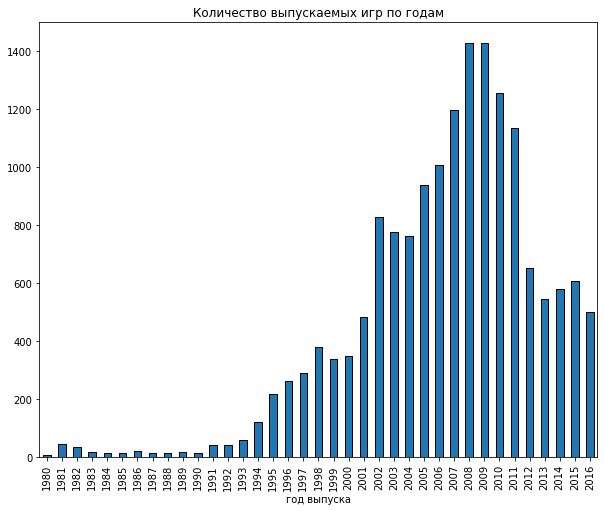

In [18]:
#Визуалируем полученную информацию и увидим, важны ли данные за все периоды.
game_by_year.plot(
    kind = 'bar', 
    figsize=(10, 8),
    ec='black',
    legend=False,
    xlabel = 'год выпуска',
    title = 'Количество выпускаемых игр по годам'
)
plt.show()

По графику наблюдаем стремительный рост с 1995 года, возможно, связанный с ростом технических характеристик компьютеров - данными за первые 15 лет можно пренебречь. Максимальные значения приходятся на 2008-2009 гг. После же видим заметное сокращение выпуска, по всей видимости, связанное с ростом распространения мобильных платформ, которые не фигурируют в датасете.

In [19]:
#Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.
data_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).to_frame()
data_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


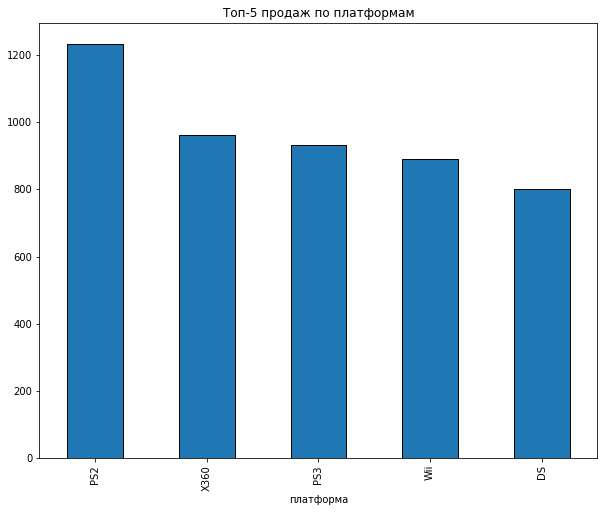

In [20]:
#Визуализация платформ с наибольшим суммарными продажами.
data_platform.head(5).plot(
    kind = 'bar', 
    figsize=(10, 8),
    ec='black',
    legend=False,
    xlabel = 'платформа',
    title = 'Топ-5 продаж по платформам'
)
plt.show()

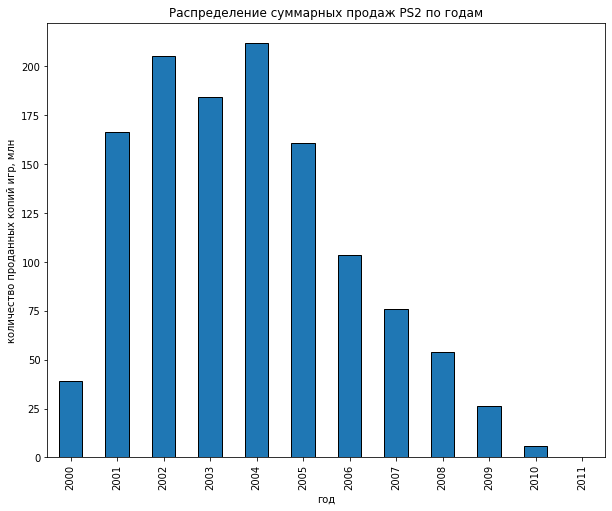

In [21]:
#Построим распределение по годам суммарных продаж PS2.
data[data['platform'] == 'PS2'].pivot_table(index = 'year_of_release', 
                                                   values = 'total_sales', 
                                                   aggfunc = 'sum').plot(
kind = 'bar', figsize = (10,8), ec='black', legend=False)
plt.title('Распределение суммарных продаж PS2 по годам')
plt.xlabel('год')
plt.ylabel('количество проданных копий игр, млн')
plt.show()

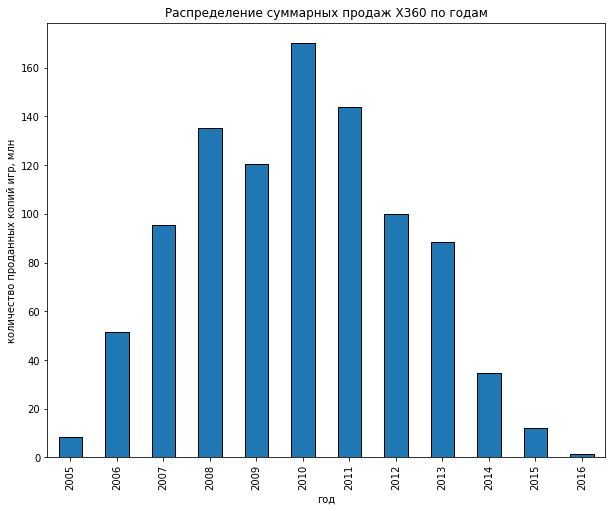

In [22]:
#Построим распределение по годам суммарных продаж X360.
data[data['platform'] == 'X360'].pivot_table(index = 'year_of_release', 
                                                   values = 'total_sales', 
                                                   aggfunc = 'sum').plot(
kind = 'bar', figsize = (10,8), ec='black', legend=False)
plt.title('Распределение суммарных продаж X360 по годам')
plt.xlabel('год')
plt.ylabel('количество проданных копий игр, млн')
plt.show()

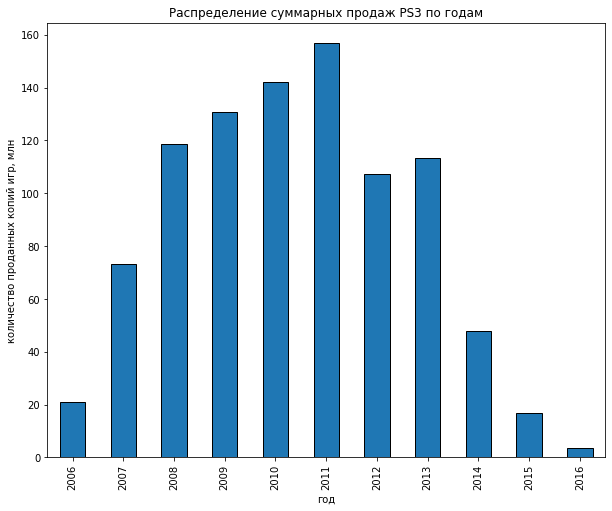

In [23]:
#Построим распределение по годам суммарных продаж PS3.
data[data['platform'] == 'PS3'].pivot_table(index = 'year_of_release', 
                                                   values = 'total_sales', 
                                                   aggfunc = 'sum').plot(
kind = 'bar', figsize = (10,8), ec='black', legend=False)
plt.title('Распределение суммарных продаж PS3 по годам')
plt.xlabel('год')
plt.ylabel('количество проданных копий игр, млн')
plt.show()

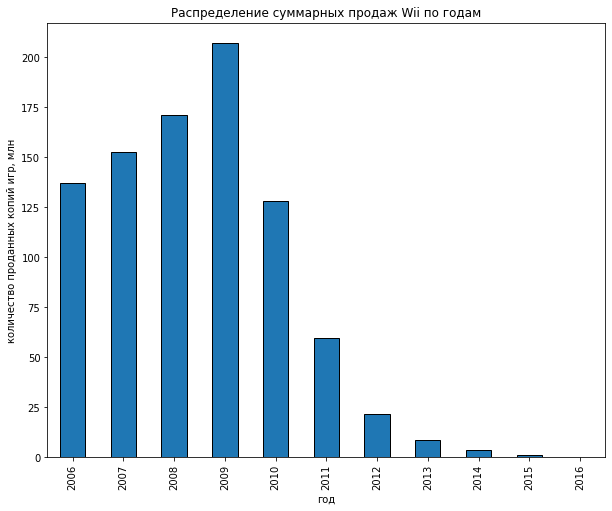

In [24]:
#Построим распределение по годам суммарных продаж Wii.
data[data['platform'] == 'Wii'].pivot_table(index = 'year_of_release', 
                                                   values = 'total_sales', 
                                                   aggfunc = 'sum').plot(
kind = 'bar', figsize = (10,8), ec='black', legend=False)
plt.title('Распределение суммарных продаж Wii по годам')
plt.xlabel('год')
plt.ylabel('количество проданных копий игр, млн')
plt.show()

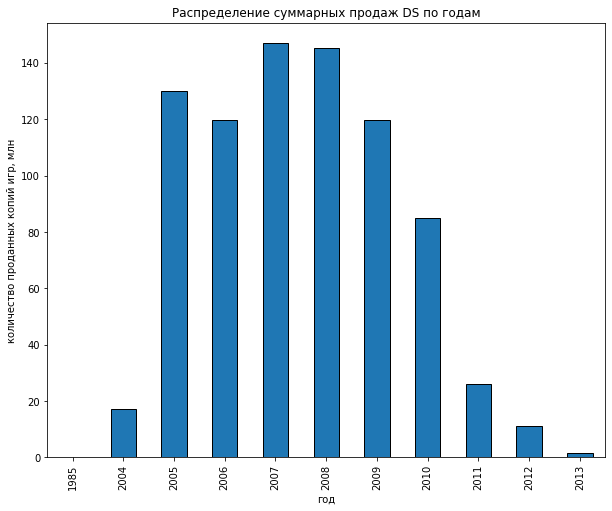

In [25]:
#Построим распределение по годам суммарных продаж DS.
data[data['platform'] == 'DS'].pivot_table(index = 'year_of_release', 
                                                   values = 'total_sales', 
                                                   aggfunc = 'sum').plot(
kind = 'bar', figsize = (10,8), ec='black', legend=False)
plt.title('Распределение суммарных продаж DS по годам')
plt.xlabel('год')
plt.ylabel('количество проданных копий игр, млн')
plt.show()

Топ-5 платформ по количеству проданных копий игр: PS2, X360, PS3, Wii, DS. Судя по графикам, отдельно взятая популярная платформа существует в среднем 7-8 лет, а пиковая величина продаж приходится на период в 4-5 лет.

In [26]:
#Актуальным периодом для платформ примем отрезок времени самых активных продаж - 5 лет.
actual_data = data.query('year_of_release > 2011')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NR,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


In [27]:
#Выведем количество выпускаемых игр для платформ по годам.
actual_data.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,93.0,91.0,80.0,86.0,46.0
DS,23.0,8.0,-,-,-
PC,61.0,38.0,47.0,50.0,54.0
PS3,148.0,126.0,108.0,73.0,38.0
PS4,-,16.0,75.0,137.0,164.0
PSP,106.0,54.0,10.0,3.0,-
PSV,53.0,63.0,100.0,110.0,85.0
Wii,31.0,12.0,6.0,4.0,1.0
WiiU,32.0,42.0,31.0,28.0,14.0


In [28]:
#Выведем количество продаж для платформ по годам.
actual_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='-')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,-,-,-
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.6
PS4,-,25.99,100.0,118.9,69.25
PSP,7.69,3.14,0.24,0.12,-
PSV,16.19,10.59,11.9,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.6


Обратите внимание, что PSV - это PlayStation Vita, пятая серия приставки была выпущена только в 2020 году.

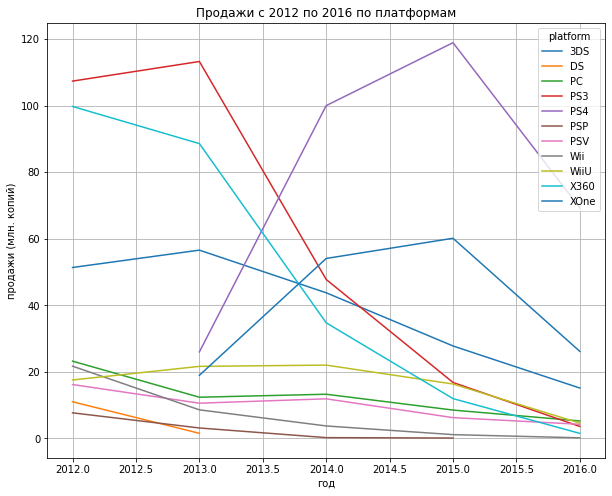

In [29]:
#Для наглядности построим графики динамики продаж по платформам за актуальный период.
actual_data.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10, 8), grid=True)
plt.title('Продажи с 2012 по 2016 по платформам')
plt.xlabel('год')
plt.ylabel('продажи (млн. копий)')
plt.show()

Было установлено, что наиболее актуальными платформами является PS4 и XOne. Портативные приставки, такие как PSP и DS потеряли свою актуальность - скорее всего, были вытеснены более популярным и быстро развивающимся рынком мобильных игр.

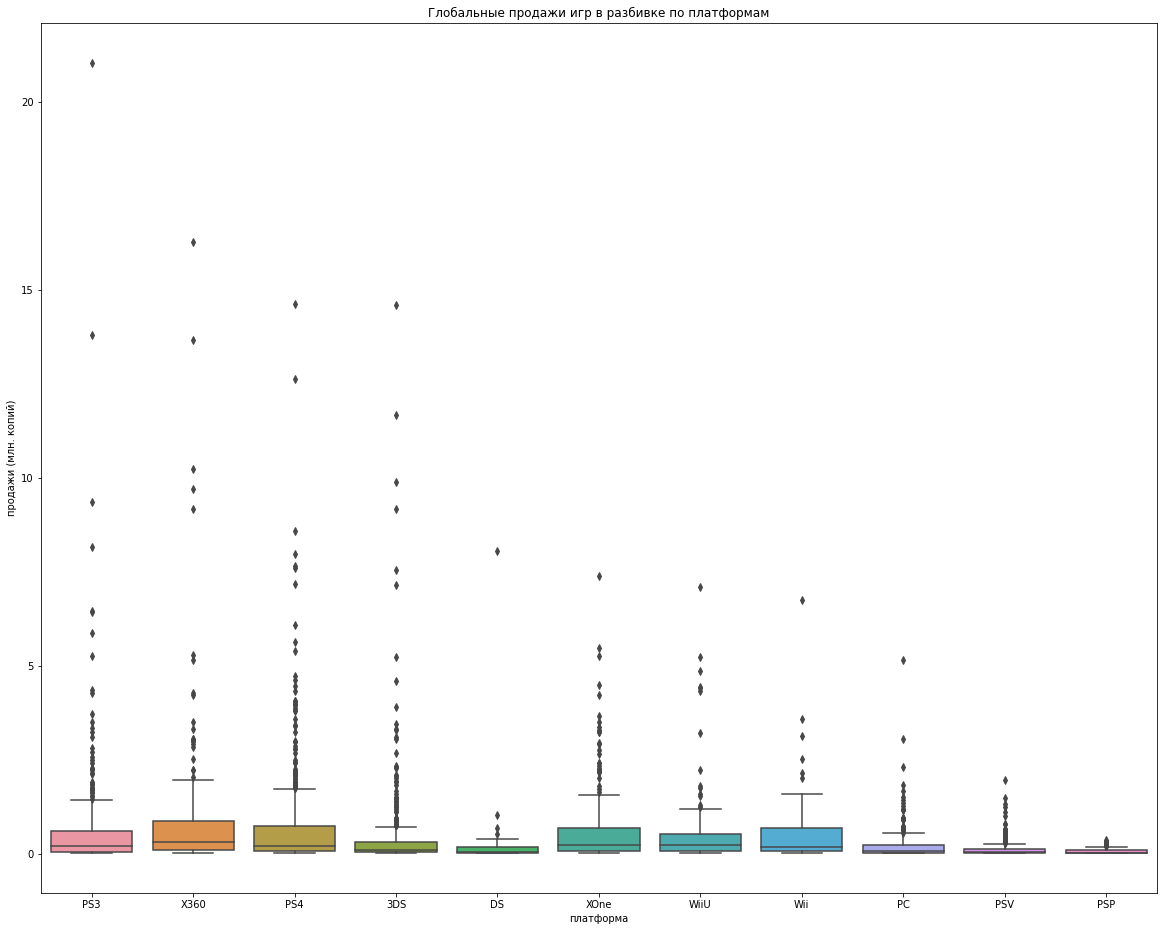

In [30]:
#Диаграмма размаха по глобальным продажам игр в разбивке по платформам.
plt.figure(figsize=(20,16))
sns.boxplot(data=actual_data, x = "platform", y= 'total_sales')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи (млн. копий)')
plt.show()

Судя по диаграмме, у первых четырех платформ имеется некоторое количество, весьма выбивающихся из общей картины продаж. Это или очень популярные игры, портированные на все перспективные платформы, а возможно, даже уникальные для одной из. Следующие платформы, начиная с DS и заканчивая PC, обладают всего одним таким значением - предполагаю, это популярные эксклюзивы.

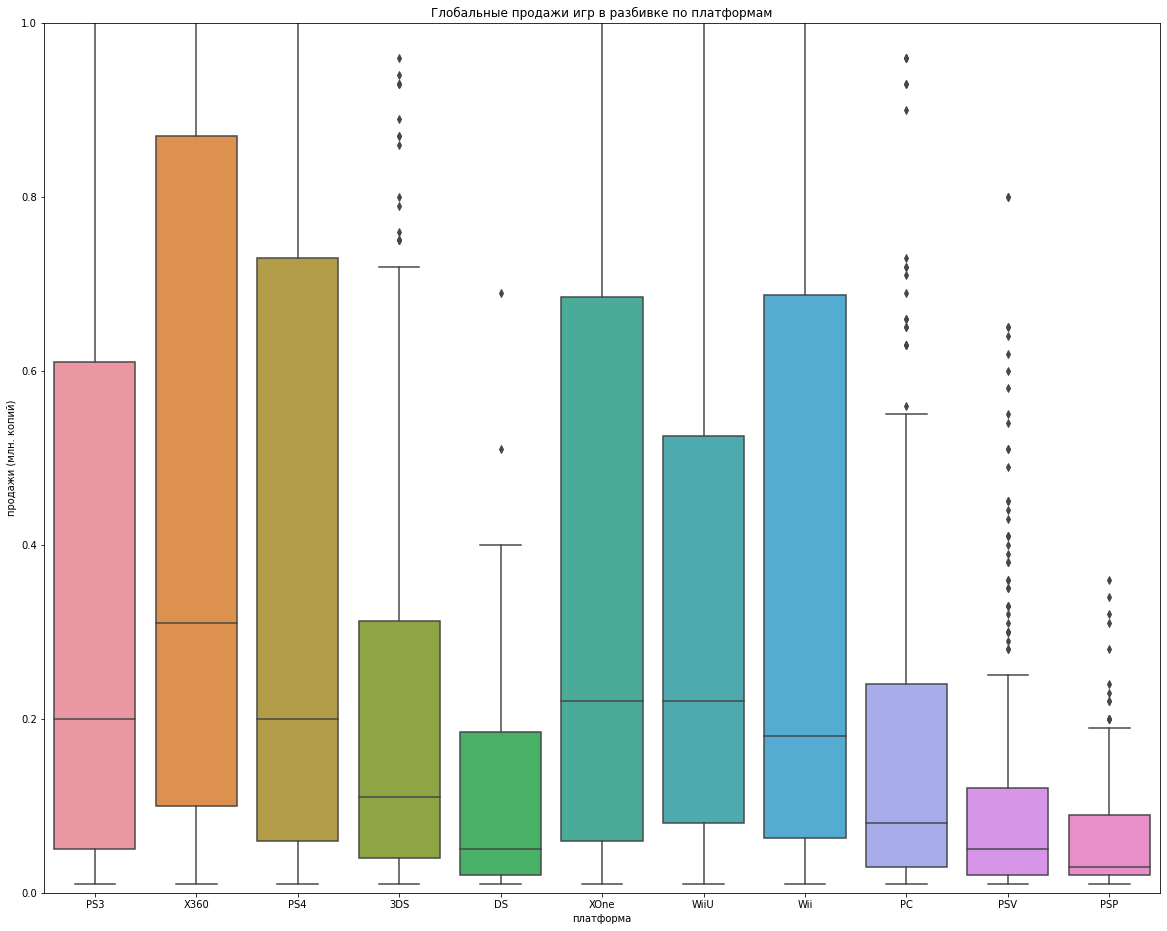

In [31]:
#Диаграмма размаха по продажам игр в разбивке по платформам (до 1 млн.)
plt.figure(figsize=(20,16))
sns.boxplot(data=actual_data, x = "platform", y= 'total_sales')
plt.ylim(0, 1)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи (млн. копий)')
plt.show()

Из более детализованной диаграммы наблюдаем, что самой надёжной платформой для разработчиков в плане продажи игр любых жанров является X360.

In [32]:
#Проверим, как влияют на продажи внутри самой популярной платформы актуального периода отзывы пользователей и критиков.
score_PS4 = actual_data.query('platform == "PS4"')
score_PS4 = score_PS4[['critic_score', 'user_score', 'total_sales']]

In [33]:
#Посчитаем корреляцию между продажами и отзывами.
for factor in score_PS4:
    correlation = score_PS4['total_sales'].corr(score_PS4[factor])
    print(f'Корреляция между total_sales и {factor} составляет: {correlation:0.2%},')

Корреляция между total_sales и critic_score составляет: 40.66%,
Корреляция между total_sales и user_score составляет: -3.20%,
Корреляция между total_sales и total_sales составляет: 100.00%,


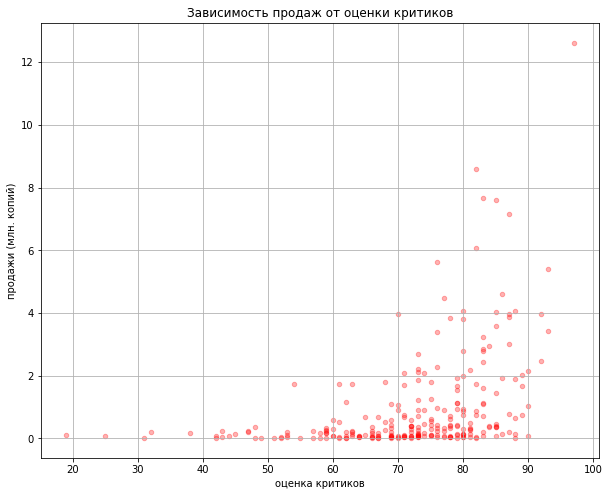

In [34]:
#Визуализируем результаты - построим диаграмму рассеяния.
score_PS4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,8), alpha=0.3, color='r', grid=True)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')
plt.show()

Наблюдается слабый коэффициент корреляции. На диаграмме видим, что игры, низко оцененные критиками, обычно не становятся бестселлерами.

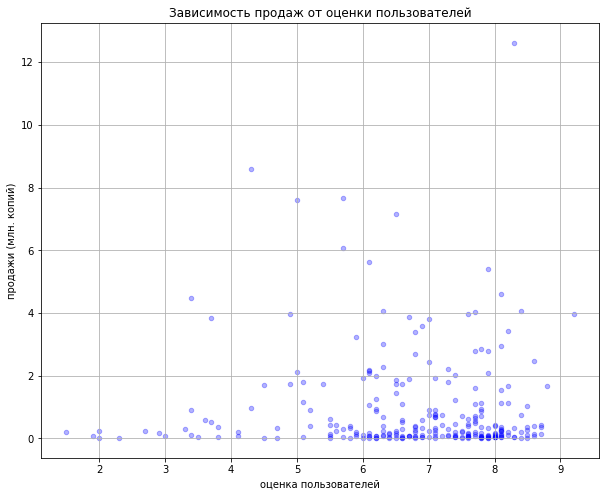

In [35]:
#Визуализируем результаты - построим диаграмму рассеяния.
score_PS4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,8), alpha=0.3, color='b', grid=True)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')
plt.show()

В случае с оценкой пользователей результат несколько иной. А именно - люди покупают игры, невзирая на пользовательский рейтинг. Во всяком случае, игры со средней оценкой тоже неплохо продаются.

In [36]:
#Рассмотрим остальные платформы - X360
actual_data.query('platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.47,0.42
user_score,0.47,1.00,-0.07
total_sales,0.42,-0.07,1.00


Похожая на PS4 ситуация с отзывами критиков.

In [37]:
#Рассмотрим остальные платформы - Wii
actual_data.query('platform == "Wii"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.82,-0.42
user_score,0.82,1.00,0.30
total_sales,-0.42,0.30,1.00


Наблюдается слабая отрицательная корреляция с оценками критиков и видим более сильную связь с оценками пользователей. Осмелюсь предположить, что объясняется это общей казуальностью платформы.

In [38]:
#Рассмотрим остальные платформы - PC
actual_data.query('platform == "PC"')[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.43,0.24
user_score,0.43,1.00,-0.12
total_sales,0.24,-0.12,1.00


Как видим, на большинство основных платформ оценки пользователей не влияют на продажи.

In [39]:
#Посмотрим на общее распределение игр по жанрам.
actual_data['genre'].value_counts().to_frame()

,genre
Action,1031
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85
Simulation,80


В целом, неудивительно, что экшн занимает лидирующую позицию в звании самого популярного жанра.

In [40]:
#Выведем жанры, где игры стабильно приносят высокий доход
genre_pivot = actual_data.pivot_table(index = 'genre',
                       values = 'total_sales',
                       aggfunc = 'mean').sort_values(ascending = False,
                                                      by = 'total_sales')
genre_pivot

,total_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


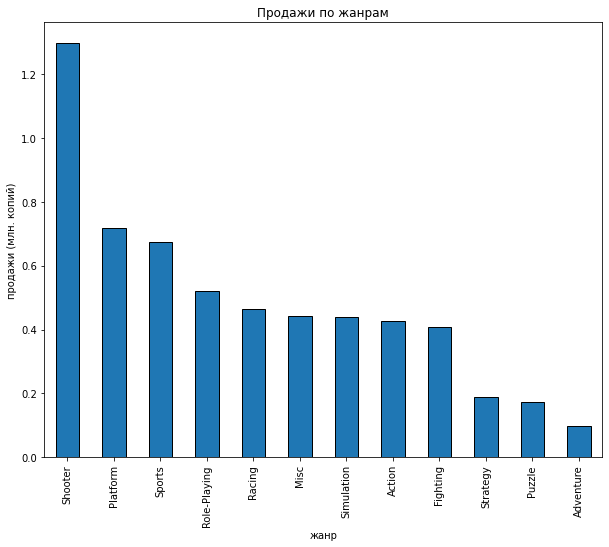

In [41]:
#Визуализируем полученную информацию.
genre_pivot.plot(kind = 'bar', figsize = (10,8), ec='black', legend=False)
plt.title('Продажи по жанрам')
plt.xlabel('жанр')
plt.ylabel('продажи (млн. копий)')
plt.show()

Шутеры является и ярким представителем среди жанров, и лидером по продажам копий игр - здесь ничего удивительного, все любят пострелять. Платформеров на рынке представлено совсем немного, но жанр оказался популярен, с хорошим показателем продаж. Игры спортивного жанра также продаются стабильно - причиной тому пользующиеся спросом, ежегодно анонсируемые, слегка доработанные и актуализированные FIFA, NHL, UFC и т.д. Низкие продажи оказались у стратегий, пазлов и приключений.

## Составление портрета пользователя каждого региона.

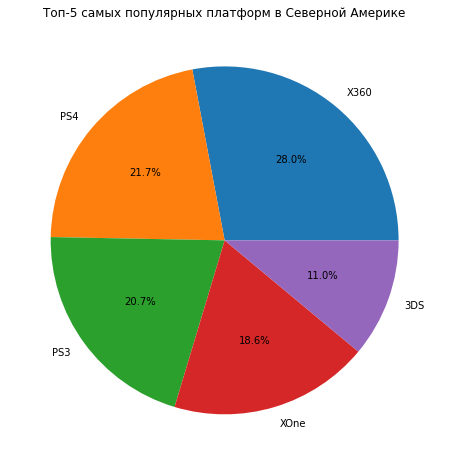

In [42]:
#Визуализируем данные по каждому региону.
platform_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na.plot(kind = 'pie', figsize=(10,8), autopct='%1.1f%%', title ='Топ-5 самых популярных платформ в Северной Америке')
plt.ylabel(None)
plt.show()

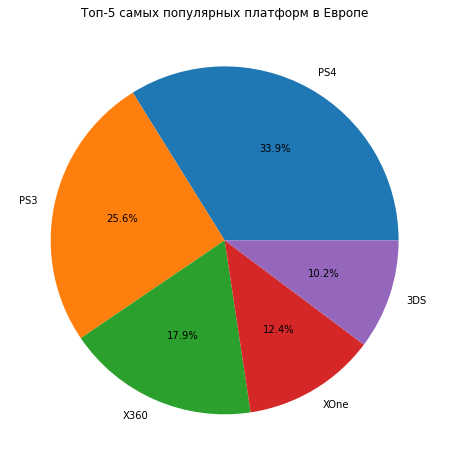

In [43]:
platform_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_eu.plot(kind = 'pie', figsize=(10,8),autopct='%1.1f%%', title ='Топ-5 самых популярных платформ в Европе')
plt.ylabel(None)
plt.show()

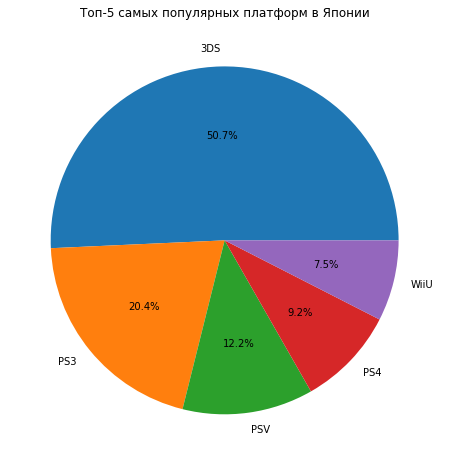

In [44]:
platform_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_jp.plot(kind = 'pie', figsize=(10,8),autopct='%1.1f%%', title ='Топ-5 самых популярных платформ в Японии')
plt.ylabel(None)
plt.show()

Вполне ожидаемо, что на рынке Северной Америки доминирует приставка фирмы Microsoft. Европейцы же предпочитают PlayStation - как новую (по тем временам) приставку, так и прошлой версии. А вот в Японии огромной популярностью пользуется отечественная портативная приставка, которая, в свою очередь, особо не интересует американцев и европейцев.

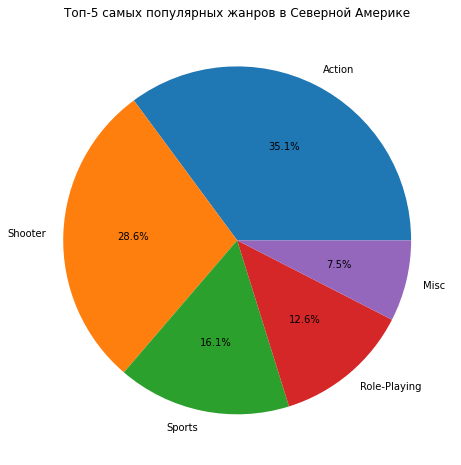

In [45]:
genre_na = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_na.plot(kind = 'pie', figsize=(10,8),autopct='%1.1f%%', title ='Топ-5 самых популярных жанров в Северной Америке')
plt.ylabel(None)
plt.show()

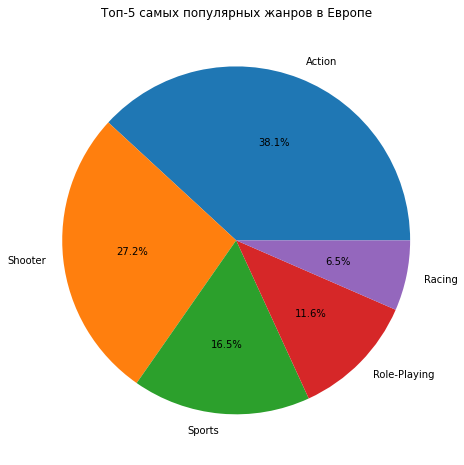

In [46]:
genre_eu = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_eu.plot(kind = 'pie', figsize=(10,8),autopct='%1.1f%%', title ='Топ-5 самых популярных жанров в Европе')
plt.ylabel(None)
plt.show()

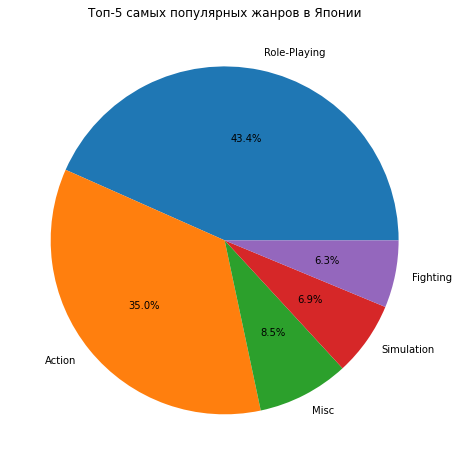

In [47]:
genre_jp = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
genre_jp.plot(kind = 'pie', figsize=(10,8),autopct='%1.1f%%', title ='Топ-5 самых популярных жанров в Японии')
plt.ylabel(None)
plt.show()

Весьма похожие жанровые предпочтения у игроков из Америки и Европы - популярны здесь шутеры и игры жанра экшн. В Японии же, с их популярнейшей линейкой Final Fantasy, такие жанры, как JRPG в частности и RPG в целом заняли прочное место в сердцах местных игроков.

In [48]:
#Создадим сводную таблицу с продажами по регионам согласно рейтингу ESRB.
data_esrb = (actual_data
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
          )
data_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
NR,91.50,108.84,103.31
T,52.96,26.02,66.02


**Значения рейтинга ESRB:**<br>

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. <br>
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.<br>
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.<br>
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

Добавим новое значение для идентификации: «NR» («No Rating») — без рейтинга.

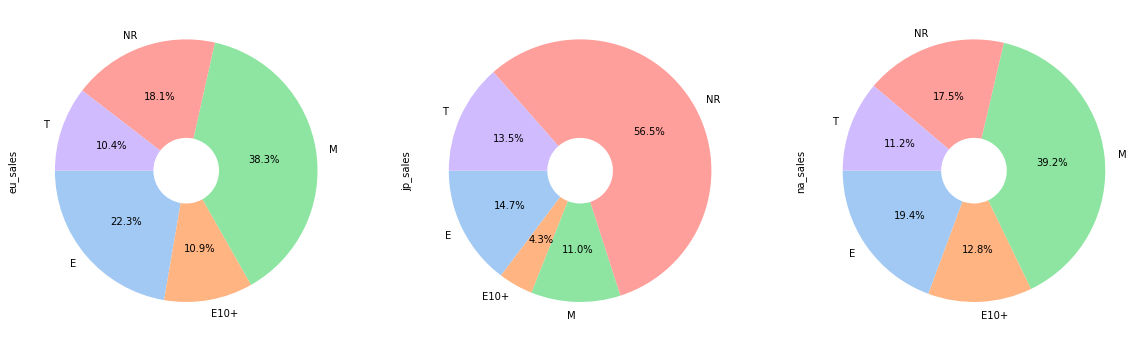

In [49]:
colors = sns.color_palette('pastel')[ 0:5 ]

data_esrb.plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize = (20,16), startangle=180, legend=False, colors = colors, 
            wedgeprops=dict(width=0.75))

plt.show()

В Северной Америке и Европе преобладает рейтинг M, это пересекается с самыми популярными жанрами: Action и Shooter. В Японии же большинство игр приобретается без рейтинга. Объясняется это тем, что ESRB - это североамериканская компания. Скорее всего, основной массе игр в Японии назначается рейтинг местной/азиатской организацией.

## Проверка гипотез.

**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем гипотезы:<br>

Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [50]:
#Создадим датафреймы c проверяемыми данными.
xbox_df = actual_data.query('platform == "XOne"')
pc_df = actual_data.query('platform == "PC"')

In [51]:
xbox_one = xbox_df['user_score'] 
pc = pc_df['user_score']

print('Средний пользовательский рейтинг Xbox One: {:.1f}'.format(xbox_one.mean()))
print('Средний пользовательский рейтинг PC: {:.1f}'.format(pc.mean()))

results = st.ttest_ind(xbox_one, 
                       pc,
                       nan_policy='omit')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг Xbox One: 6.5
Средний пользовательский рейтинг PC: 6.4
p-значение: 0.5535080500643738
Не удалось отвергнуть нулевую гипотезу


Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC - средние пользовательские рейтинги с большой вероятностью равны.

**Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.**

Сформулируем гипотезы:<br>

Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports одинаковые.<br>
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [52]:
#Создадим датафреймы c проверяемыми данными.
action_df = actual_data.query('genre == "Action"')
sports_df = actual_data.query('genre == "Sports"')

In [53]:
action = action_df['user_score'] 
sports = sports_df['user_score']

print('Средний пользовательский рейтинг жанра Action: {:.1f}'.format(action.mean()))
print('Средний пользовательский рейтинг жанра Sports: {:.1f}'.format(sports.mean()))

results = st.ttest_ind(action, 
                       sports,
                       nan_policy='omit')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 6.8
Средний пользовательский рейтинг жанра Sports: 5.5
p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports - средние пользовательские рейтинги с большой вероятностью отличаются.

## Общий вывод.

**1. Были загружен датасет с информацией о продажах игр, оценки пользователей и экспертов, жанры и платформы  и изучен данный материал.<br>
  2. Выполнена предварительная обработка данных - приведены названия столбцов к нижнему регистру, удалены пропущенные значения, преобразован тип данных в нужных столбцах, посчитаны суммарные продажи во всех регионах и добавлен новый столбец.<br>
  3. Произведен исследовательский анализ данных. Выявлено, что периодом с 1980 по 1994 в дальнейших расчетах можно пренебречь из-за малого количества выпускаемых игр на тот момент. Наблюдается стремительный рост с 1995 года, возможно, связанный с ростом технических характеристик компьютеров. Максимальные значения приходятся на 2008-2009 гг. После же видим заметное сокращение выпуска, по всей видимости, связанное с ростом распространения мобильных платформ. Актуальным периодом для платформ является отрезок времени самых активных продаж - 5 лет. Топ-5 платформ по количеству проданных копий игр: PS2, X360, PS3, Wii, DS. Судя по графикам, отдельно взятая популярная платформа существует в среднем 7-8 лет, а пиковая величина продаж приходится на период в 4-5 лет. Самой надёжной платформой для разработчиков в плане продажи игр любых жанров является X360. Экшн является и ярким представителем среди жанров, и лидером по продажам копий игр. По поводу РПГ можно сказать, что на рынке представлено много игр, но по продажам уступает место более популярному жанру - шутер. Минимальное количество игр и низкие продажи у стратегий и пазлов.<br>
  4. Составлен портрет пользователя каждого региона. На рынке Северной Америки доминирует приставка фирмы Microsoft. Европейцы же предпочитают PlayStation - как новую (по тем временам) приставку, так и прошлой версии. А вот в Японии огромной популярностью пользуется отечественная портативная приставка, которая, в свою очередь, особо не интересует американцев и европейцев.Весьма похожие жанровые предпочтения у игроков из Америки и Европы - популярны здесь шутеры и игры жанра экшн. В Японии же занял прочное первое место у геймеров жанр RPG.<br>
  5. Были проверены гипотезы:<br>
  a) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - оказалось, что средние пользовательские рейтинги с большой вероятностью равны;<br>
  b) Средние пользовательские рейтинги жанров Action и Sports разные (отвергнута).**